<a href="https://colab.research.google.com/github/KrisMatrix/DataScience/blob/main/Medical_Cost_Personal_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Datasets

**Kaggle Page:** https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
#modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/KrisMatrix/DataScience/main/Medical_Cost_Personal_Datasets/insurance.csv")
df.head()
#len(df.age)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We are trying to do a linear regression problem. This dataset (in .csv format) is insurance data that outlines a give person's gender, bmi, whether they are a smoker or not, where they come from and how many children they have. 

First let's do comparison of prices with respect to age, bmi, smoker independently.


## Age vs Prices

Let's draw a histogram where the bins are 5 or perhaps 10 years per bin

## Machine Learning

Split the data into training and testing dataset. 66% training and 33% testing dataset. Split the data into features and labels (charges). Train and fit the model. The predict.


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
data = df
data.head()
#data['smoker'].unique()
data['smoker'][data['smoker'] == 'yes'] = 1
data['smoker'][data['smoker'] == 'no'] = 0
data.head()
data['region'].unique()
data['region'][data['region'] == 'southwest'] = 1
data['region'][data['region'] == 'southeast'] = 2
data['region'][data['region'] == 'northwest'] = 3
data['region'][data['region'] == 'northeast'] = 4
data.head()
data['sex'][data['sex'] == 'male'] = 1
data['sex'][data['sex'] == 'female'] = 0
data.head()
data.dtypes
data['sex'] = pd.to_numeric(data['sex'])
data['smoker'] = pd.to_numeric(data['smoker'])
data['region'] = pd.to_numeric(data['region'])
data.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: Se

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [9]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,3,10600.5483
1334,18,0,31.92,0,0,4,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,1,2007.9450
1337,61,0,29.07,0,1,3,29141.3603


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train, test = train_test_split(df, test_size=0.33)

In [12]:
train.head()

,age,sex,bmi,children,smoker,region,charges
433,60,0,30.500,0,0,1,12638.19500
1255,42,0,37.900,0,0,1,6474.01300
578,52,1,30.200,1,0,1,9724.53000
233,59,1,27.500,1,0,1,12333.82800
882,21,0,22.135,0,0,4,2585.85065


In [13]:
test.head()

,age,sex,bmi,children,smoker,region,charges
63,28,0,25.935,1,0,3,4133.64165
1126,55,1,29.900,0,0,1,10214.63600
850,37,0,30.780,0,1,4,37270.15120
406,33,0,24.310,0,0,2,4185.09790
217,27,1,23.100,0,0,2,2483.73600


In [14]:
train.shape, test.shape

((896, 7), (442, 7))

In [15]:
X_train = train.drop(columns=['charges'])
y_train = train['charges']
X_test = test.drop(columns=['charges'])
y_test = test['charges']
#X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((896, 6), (896,), (442, 6), (442,))

### ML with Sequenital Round 1

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
28/28 [==============================] - 0s 1ms/step - loss: 12929.2324 - mae: 12929.2324
Epoch 2/50
28/28 [==============================] - 0s 1ms/step - loss: 12236.2900 - mae: 12236.2900
Epoch 3/50
28/28 [==============================] - 0s 1ms/step - loss: 11548.4697 - mae: 11548.4697
Epoch 4/50
28/28 [==============================] - 0s 1ms/step - loss: 10895.8154 - mae: 10895.8154
Epoch 5/50
28/28 [==============================] - 0s 1ms/step - loss: 10304.7061 - mae: 10304.7061
Epoch 6/50
28/28 [==============================] - 0s 1ms/step - loss: 9778.4531 - mae: 9778.4531
Epoch 7/50
28/28 [==============================] - 0s 1ms/step - loss: 9317.9824 - mae: 9317.9824
Epoch 8/50
28/28 [==============================] - 0s 1ms/step - loss: 8913.4990 - mae: 8913.4990
Epoch 9/50
28/28 [==============================] - 0s 1ms/step - loss: 8574.5439 - mae: 8574.5439
Epoch 10/50
28/28 [==============================] - 0s 1ms/step - loss: 8297.8896 - mae: 8297.8896

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((896, 6), (896,), (442, 6), (442,))

In [18]:
y_preds = model.predict(X_test)     #y_test is actual data. y_preds is the model predicted data. We want to compare y_test with y_preds

In [19]:
y_preds

array([[ 6250.7554],
       [10891.516 ],
       [ 8033.4253],
       [ 6952.004 ],
       [ 5896.7163],
       [ 9634.078 ],
       [ 6658.0513],
       [ 5424.559 ],
       [ 7558.2695],
       [ 5220.5713],
       [ 7858.334 ],
       [ 6350.9985],
       [ 6108.711 ],
       [ 5317.389 ],
       [11526.036 ],
       [ 6938.589 ],
       [ 5664.0005],
       [ 4875.643 ],
       [ 5111.4316],
       [ 9295.224 ],
       [ 4660.3193],
       [ 9823.737 ],
       [ 6019.6865],
       [ 8232.84  ],
       [ 4872.263 ],
       [ 5879.063 ],
       [10677.456 ],
       [11311.772 ],
       [ 7945.9507],
       [ 8592.692 ],
       [ 9002.377 ],
       [ 9736.934 ],
       [12544.832 ],
       [ 5336.1836],
       [ 7758.407 ],
       [ 9606.594 ],
       [ 5320.3813],
       [12400.884 ],
       [ 6284.95  ],
       [ 5833.708 ],
       [ 5013.061 ],
       [10848.848 ],
       [ 9816.016 ],
       [ 9390.413 ],
       [ 4337.943 ],
       [ 7748.7617],
       [ 6244.7524],
       [ 9190

### ML Round 2

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1),
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
28/28 [==============================] - 0s 1ms/step - loss: 9013.4473 - mae: 9013.4473
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 7706.8867 - mae: 7706.8867
Epoch 3/50
28/28 [==============================] - 0s 1ms/step - loss: 7805.3931 - mae: 7805.3931
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 7786.5327 - mae: 7786.5327
Epoch 5/50
28/28 [==============================] - 0s 1ms/step - loss: 7755.6860 - mae: 7755.6860
Epoch 6/50
28/28 [==============================] - 0s 1ms/step - loss: 7623.4878 - mae: 7623.4878
Epoch 7/50
28/28 [==============================] - 0s 1ms/step - loss: 7655.5347 - mae: 7655.5347
Epoch 8/50
28/28 [==============================] - 0s 1ms/step - loss: 7909.2656 - mae: 7909.2656
Epoch 9/50
28/28 [==============================] - 0s 1ms/step - loss: 7650.5039 - mae: 7650.5039
Epoch 10/50
28/28 [==============================] - 0s 1ms/step - loss: 7622.5522 - mae: 7622.5522
Epoch 11/

In [21]:
y_preds = model.predict(X_test)     #y_test is actual data. y_preds is the model predicted data. We want to compare y_test with y_preds

### ML Round 3

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
28/28 [==============================] - 1s 2ms/step - loss: 8730.5732 - mae: 8730.5732
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 7677.5630 - mae: 7677.5630
Epoch 3/250
28/28 [==============================] - 0s 3ms/step - loss: 7755.1304 - mae: 7755.1304
Epoch 4/250
28/28 [==============================] - 0s 2ms/step - loss: 7816.6138 - mae: 7816.6138
Epoch 5/250
28/28 [==============================] - 0s 1ms/step - loss: 7519.6499 - mae: 7519.6499
Epoch 6/250
28/28 [==============================] - 0s 2ms/step - loss: 7700.8003 - mae: 7700.8003
Epoch 7/250
28/28 [==============================] - 0s 2ms/step - loss: 7657.3618 - mae: 7657.3618
Epoch 8/250
28/28 [==============================] - 0s 2ms/step - loss: 7907.5718 - mae: 7907.5718
Epoch 9/250
28/28 [==============================] - 0s 2ms/step - loss: 7646.1001 - mae: 7646.1001
Epoch 10/250
28/28 [==============================] - 0s 1ms/step - loss: 7590.8823 - mae: 7590.8823

In [23]:
y_preds = model.predict(X_test)     #y_test is actual data. y_preds is the model predicted data. We want to compare y_test with y_preds

## Model 4

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  #tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
28/28 [==============================] - 0s 2ms/step - loss: 8730.5732 - mae: 8730.5732
Epoch 2/250
28/28 [==============================] - 0s 1ms/step - loss: 7677.5630 - mae: 7677.5630
Epoch 3/250
28/28 [==============================] - 0s 1ms/step - loss: 7755.1304 - mae: 7755.1304
Epoch 4/250
28/28 [==============================] - 0s 1ms/step - loss: 7816.6138 - mae: 7816.6138
Epoch 5/250
28/28 [==============================] - 0s 1ms/step - loss: 7519.6499 - mae: 7519.6499
Epoch 6/250
28/28 [==============================] - 0s 2ms/step - loss: 7700.8003 - mae: 7700.8003
Epoch 7/250
28/28 [==============================] - 0s 1ms/step - loss: 7657.3618 - mae: 7657.3618
Epoch 8/250
28/28 [==============================] - 0s 2ms/step - loss: 7907.5718 - mae: 7907.5718
Epoch 9/250
28/28 [==============================] - 0s 1ms/step - loss: 7646.1001 - mae: 7646.1001
Epoch 10/250
28/28 [==============================] - 0s 1ms/step - loss: 7590.8823 - mae: 7590.8823

In [25]:
model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 7667.7686 - mae: 7667.7686


[7667.7685546875, 7667.7685546875]

## Let's Rest

In [27]:
insurance = pd.read_csv("https://raw.githubusercontent.com/KrisMatrix/DataScience/main/Medical_Cost_Personal_Datasets/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
insurance_one_hot = pd.get_dummies(insurance)

In [29]:
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [30]:
X = insurance_one_hot.drop("charges",axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [31]:
y = insurance_one_hot['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [32]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42) # set random state for reproducible splits

In [33]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 9238.1045 - mae: 9238.1045
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 7864.1211 - mae: 7864.1211
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 7904.3940 - mae: 7904.3940
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 8105.3276 - mae: 8105.3276
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 7959.0474 - mae: 7959.0474
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 7701.9497 - mae: 7701.9497
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 7689.2578 - mae: 7689.2578
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 7771.1689 - mae: 7771.1689
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 7685.9849 - mae: 7685.9849
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 7780.8862 - mae: 7780.8862

In [34]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 8880.9473 - mae: 8880.9473


[8880.947265625, 8880.947265625]

In [35]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [36]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

14/14 [==============================] - 0s 3ms/step - loss: 5622.1743 - mae: 5622.1743


[5622.17431640625, 5622.17431640625]

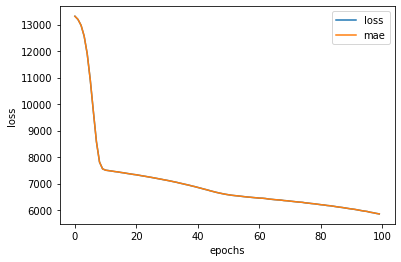

In [37]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [38]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [39]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

14/14 [==============================] - 0s 2ms/step - loss: 3678.7900 - mae: 3678.7900


(3678.7900390625, 3678.7900390625)

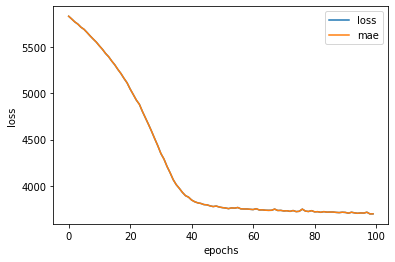

In [40]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

### THE END